In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/insurance-claim-analysis-demographic-and-health")

df = pd.read_csv(f"{path}/insurance_data.csv")

Using Colab cache for faster access to the 'insurance-claim-analysis-demographic-and-health' dataset.


In [ ]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.drop(['index', 'PatientID'], axis =1, inplace = True)

In [ ]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.isnull().sum()

,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3
claim,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(df.drop('claim', axis = 1), df['claim'], test_size = 0.3, random_state = 42)

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
x_train.isnull().sum()

,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [ ]:
x_test.isnull().sum()

,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


In [ ]:
x_val.isnull().sum()

,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


In [ ]:
x_train['age'] = x_train['age'].fillna(x_train.age.median())

In [ ]:
x_train.isnull().sum()

,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [ ]:
x_train.region = x_train.region.fillna(x_train.region.mode()[0])

In [ ]:
x_train.isnull().sum()

,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


In [ ]:
x_train.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
1177,55.0,female,27.7,111,Yes,0,Yes,northeast
1080,43.0,male,33.0,85,No,0,No,southeast
332,46.0,female,28.6,80,No,5,No,southwest
355,38.0,male,30.1,87,No,5,No,southeast
138,32.0,male,24.5,90,Yes,0,No,southeast


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bloodpressure'}>,
        <Axes: title={'center': 'children'}>]], dtype=object)

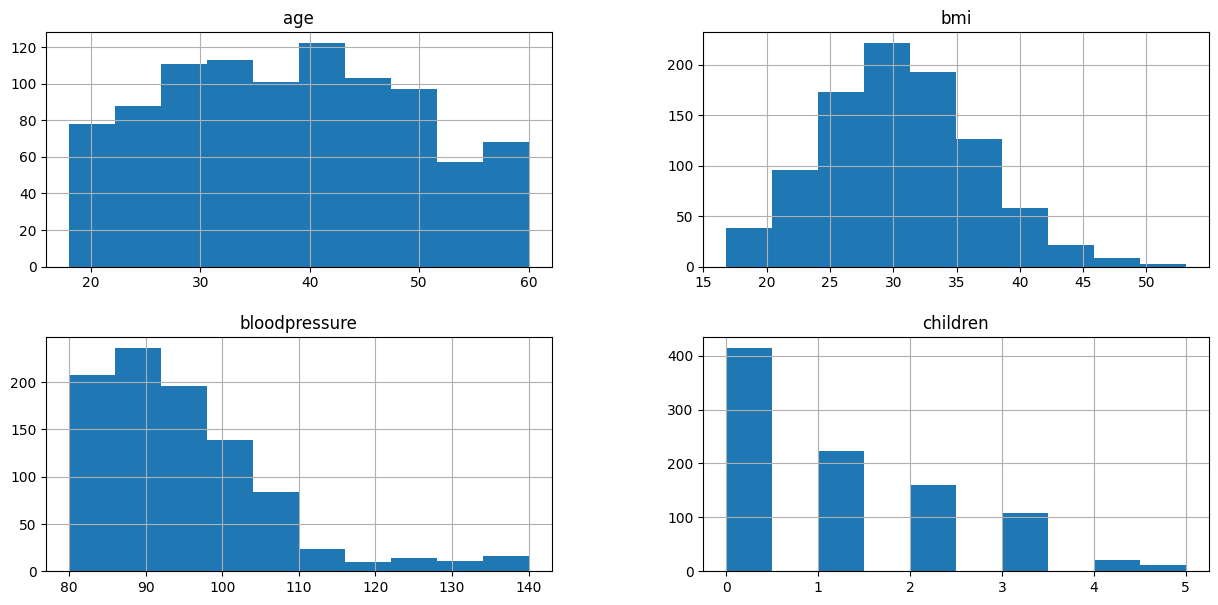

In [ ]:
x_train.hist(figsize=(15,7))

In [ ]:
x_train['bloodpressure_log'] = np.log(x_train['bloodpressure'])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bloodpressure'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'bloodpressure_log'}>, <Axes: >]],
      dtype=object)

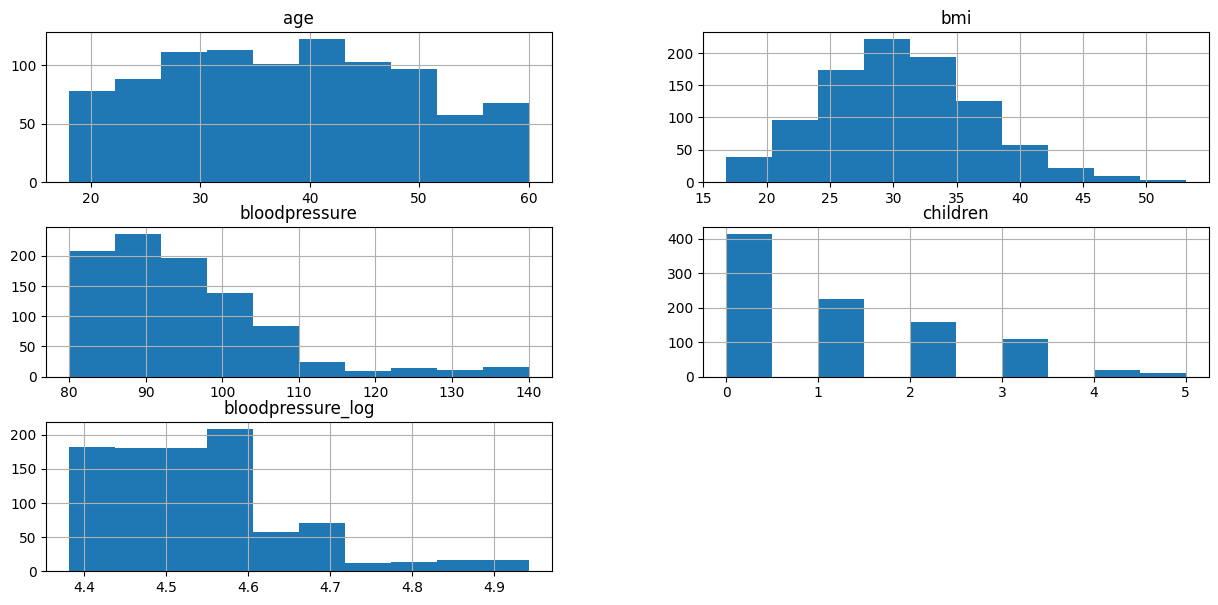

In [ ]:
x_train.hist(figsize=(15,7))

In [ ]:
x_train['bmi_smoker'] = x_train['bmi'] * x_train['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
x_train.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,bloodpressure_log,bmi_smoker
1177,55.0,female,27.7,111,Yes,0,Yes,northeast,4.709530,NaN
1080,43.0,male,33.0,85,No,0,No,southeast,4.442651,NaN
332,46.0,female,28.6,80,No,5,No,southwest,4.382027,NaN
355,38.0,male,30.1,87,No,5,No,southeast,4.465908,NaN
138,32.0,male,24.5,90,Yes,0,No,southeast,4.499810,NaN


In [ ]:
x_train.drop('bmi_smoker', axis= 1,inplace=True)

In [ ]:
x_train.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,bloodpressure_log
1177,55.0,female,27.7,111,Yes,0,Yes,northeast,4.709530
1080,43.0,male,33.0,85,No,0,No,southeast,4.442651
332,46.0,female,28.6,80,No,5,No,southwest,4.382027
355,38.0,male,30.1,87,No,5,No,southeast,4.465908
138,32.0,male,24.5,90,Yes,0,No,southeast,4.499810


In [ ]:
x_train[x_train['age'] < 1]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,bloodpressure_log


In [ ]:
x_train.drop('bloodpressure_log', axis = 1, inplace=True)

In [ ]:
x_train.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
1177,55.0,female,27.7,111,Yes,0,Yes,northeast
1080,43.0,male,33.0,85,No,0,No,southeast
332,46.0,female,28.6,80,No,5,No,southwest
355,38.0,male,30.1,87,No,5,No,southeast
138,32.0,male,24.5,90,Yes,0,No,southeast


In [ ]:
numeric_cols = ['age', 'bmi', 'bloodpressure', 'children']
categorical_cols = ['gender','diabetic', 'smoker', 'region']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

In [ ]:
# x_train_preprocessed = preprocessor.fit_transform(x_train)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
model = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        # ('pca', PCA(n_components=2)),
        ('regressor', LinearRegression())
    ]
)

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'diabetic',
                                                   'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'bloodpressure',
                                                   'children'])])),
                ('regressor', LinearRegression())])

In [ ]:
model.score(x_val, y_val)

0.731015339411115

In [ ]:
model.score(x_train, y_train)

0.6914064923236745

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_val)
rmse = mean_squared_error(y_val, y_pred)
rmse


42272504.40570709

In [ ]:
np.sqrt(rmse)

np.float64(6501.730877674582)

In [ ]:
y_val.mean()

np.float64(14099.31223880597)

In [ ]:
y_train.mean()

np.float64(13112.033731343285)

In [ ]:
6501/14099 * 100

46.10965316689127